In [2]:
pip install pyspark findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=16de09934cbbd5bb3e070362515ede61705331df5e79726f367d5241b88926a1
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


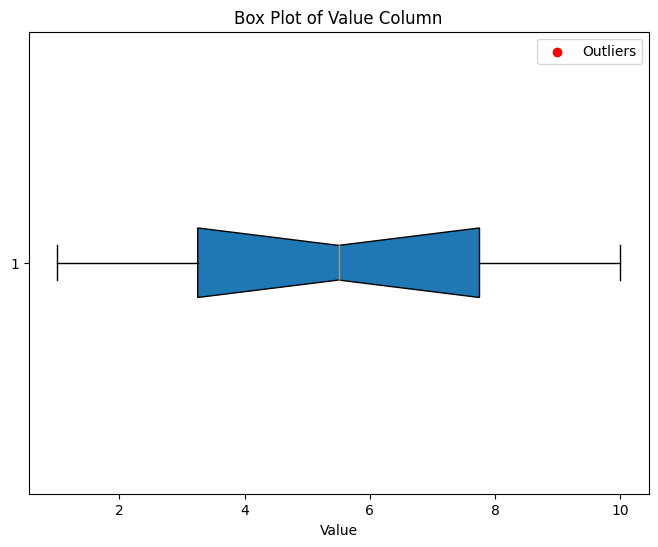

In [3]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
# Create SparkSession
spark = SparkSession.builder \
    .appName("BoxPlot") \
    .getOrCreate()
# Sample data (replace this with your DataFrame)
data = [(1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,)]
df = spark.createDataFrame(data, ["value"])
# Calculate quartiles
quartiles = df.approxQuantile("value", [0.25, 0.5, 0.75], 0.05)
# Calculate interquartile range
q1, q3 = quartiles[0], quartiles[2]
iqr = q3 - q1
# Calculate lower and upper bounds for identifying outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
# Identify outliers
outliers_df = df.filter((df["value"] < lower_bound) | (df["value"] > upper_bound))
# Extract values for box plot
values = df.select("value").rdd.flatMap(lambda x: x).collect()
outliers = outliers_df.select("value").rdd.flatMap(lambda x: x).collect()
# Create box plot
plt.figure(figsize=(8, 6))
plt.boxplot(values, patch_artist=True, showfliers=True, notch=True, vert=False)
plt.scatter(outliers, [1] * len(outliers), color='r', label='Outliers')
plt.xlabel('Value')
plt.title('Box Plot of Value Column')
plt.legend()
plt.show()
# Stop SparkSession
spark.stop()


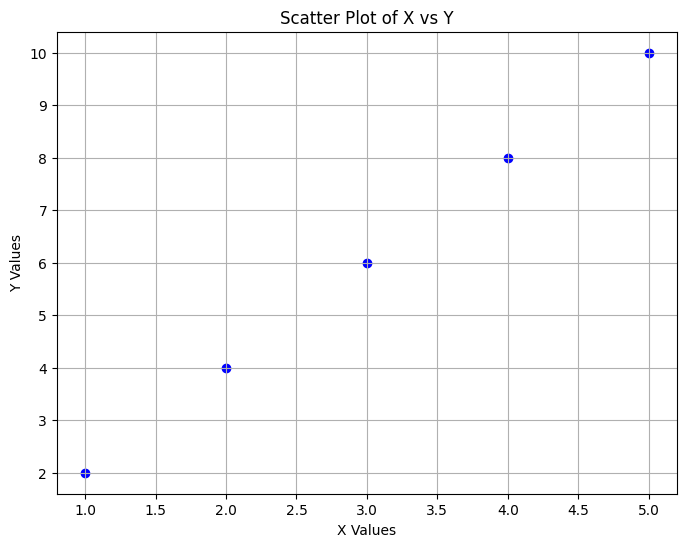

In [4]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Create SparkSession
spark = SparkSession.builder \
    .appName("ScatterPlot") \
    .getOrCreate()
#Sample data (replace this with your DataFrame)
data = [(1, 2), (2, 4), (3, 6), (4, 8), (5, 10)]
df = spark.createDataFrame(data, ["x", "y"])
# Customize labels, titles, and colors
x_label = "X Values"
y_label = "Y Values"
plot_title = "Scatter Plot of X vs Y"
scatter_color = "blue"
# Extract values for scatter plot
x_values = df.select("x").rdd.flatMap(lambda x: x).collect()
y_values = df.select("y").rdd.flatMap(lambda x: x).collect()
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color=scatter_color)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_title)
plt.grid(True)
plt.show()
# Stop SparkSession
spark.stop()


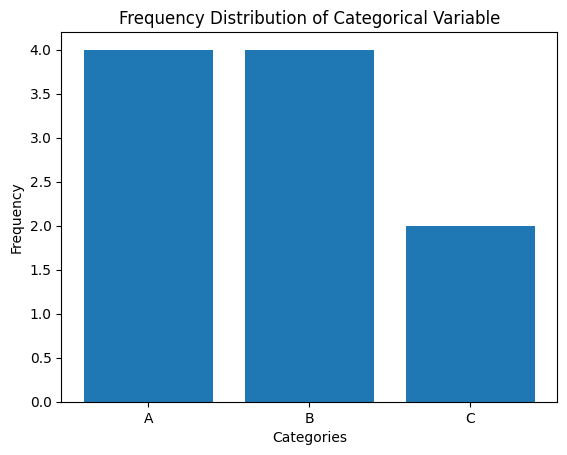

In [5]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
# Create a SparkSession
spark = SparkSession.builder \
    .appName("CategoricalVariableFrequency") \
    .getOrCreate()
# Assuming you have a DataFrame named df with a categorical variable named 'category'
# Read your DataFrame or create a sample one
# df = spark.read.csv("your_data.csv", header=True, inferSchema=True)
# Example DataFrame creation
data = [("A",), ("B",), ("A",), ("C",), ("A",), ("B",), ("B",), ("C",), ("A",), ("B",)]
columns = ["category"]
df = spark.createDataFrame(data, columns)
# Calculate frequency distribution
freq_df = df.groupBy("category").count().orderBy("category")
# Collect data to plot
categories = [row['category'] for row in freq_df.collect()]
counts = [row['count'] for row in freq_df.collect()]
# Plotting the bar chart
plt.bar(categories, counts)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Categorical Variable')
plt.show()
# Stop the SparkSession
spark.stop()


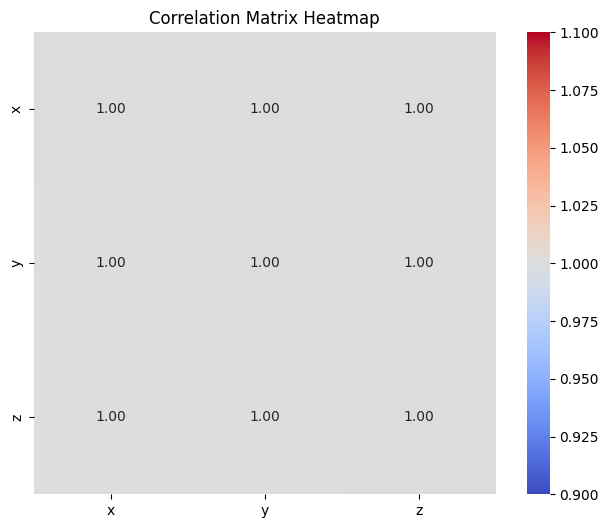

In [6]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import seaborn as sns
import matplotlib.pyplot as plt
# Create SparkSession
spark = SparkSession.builder \
    .appName("CorrelationMatrix") \
    .getOrCreate()
# Sample data (replace this with your DataFrame)
data = [(1, 2, 3), (2, 4, 6), (3, 6, 9), (4, 8, 12), (5, 10, 15)]
df = spark.createDataFrame(data, ["x", "y", "z"])
# Assemble features into a single vector column
assembler = VectorAssembler(inputCols=df.columns, outputCol="features")
df_assembled = assembler.transform(df)
# Calculate correlation matrix
corr_matrix = Correlation.corr(df_assembled, "features").collect()[0][0]
# Convert correlation matrix to Pandas DataFrame for visualization
corr_pd = corr_matrix.toArray().tolist()
columns = df.columns
corr_pd_df = spark.createDataFrame(corr_pd, columns).toPandas()
# Visualize correlation matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_pd_df, annot=True, cmap="coolwarm", fmt=".2f", square=True, cbar=True,
            xticklabels=columns, yticklabels=columns)
plt.title("Correlation Matrix Heatmap")
plt.show()
# Stop SparkSession
spark.stop()


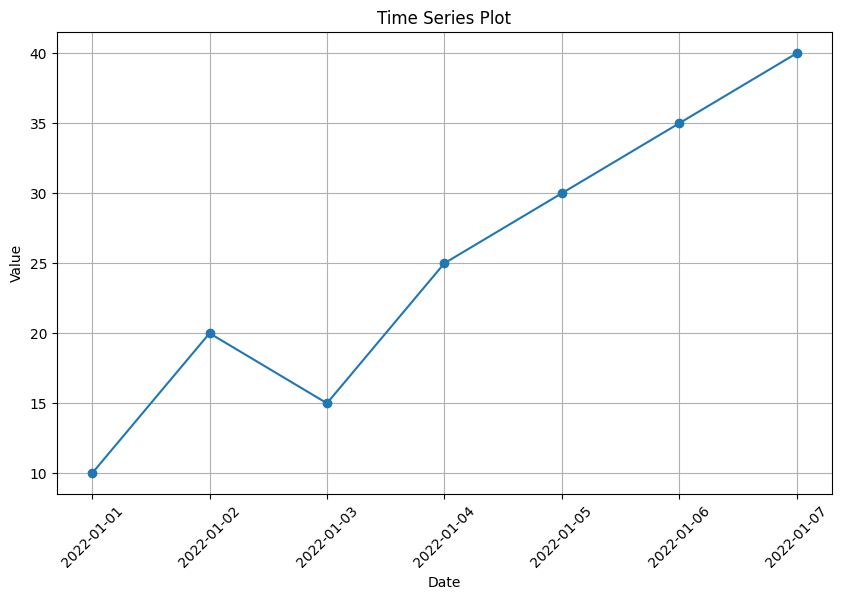

In [7]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
# Create SparkSession
spark = SparkSession.builder \
    .appName("TimeSeriesPlot") \
    .getOrCreate()
# Sample data (replace this with your DataFrame)
data = [("2022-01-01", 10),
        ("2022-01-02", 20),
        ("2022-01-03", 15),
        ("2022-01-04", 25),
        ("2022-01-05", 30),
        ("2022-01-06", 35),
        ("2022-01-07", 40)]
df = spark.createDataFrame(data, ["Date", "value"])  # Update column name to "Date"
# Convert DataFrame to Pandas DataFrame for visualization
df_pandas = df.toPandas()
# Generate time series plot
plt.figure(figsize=(10, 6))
plt.plot(df_pandas["Date"], df_pandas["value"], marker='o')  # Use "Date" as x-axis
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Time Series Plot")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# Stop SparkSession
spark.stop()


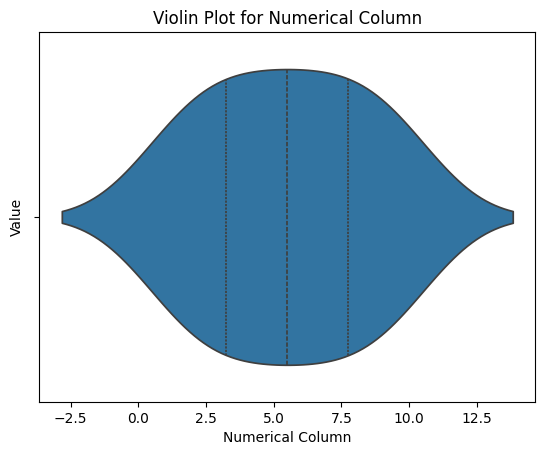

In [8]:
from pyspark.sql import SparkSession
import seaborn as sns
import matplotlib.pyplot as plt
# Create a SparkSession
spark = SparkSession.builder \
    .appName("ViolinPlot") \
    .getOrCreate()
# Assuming you have a DataFrame named df with a numerical column named 'numerical_column'
# Read your DataFrame or create a sample one
# df = spark.read.csv("your_data.csv", header=True, inferSchema=True)
# Example DataFrame creation
data = [(1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,)]
columns = ["numerical_column"]
df = spark.createDataFrame(data, columns)
# Convert Spark DataFrame to Pandas DataFrame for plotting
pandas_df = df.toPandas()
# Plotting the violin plot
sns.violinplot(data=pandas_df, x='numerical_column', inner="quartile")
plt.title('Violin Plot for Numerical Column')
plt.xlabel('Numerical Column')
plt.ylabel('Value')
plt.show()
# Stop the SparkSession
spark.stop()


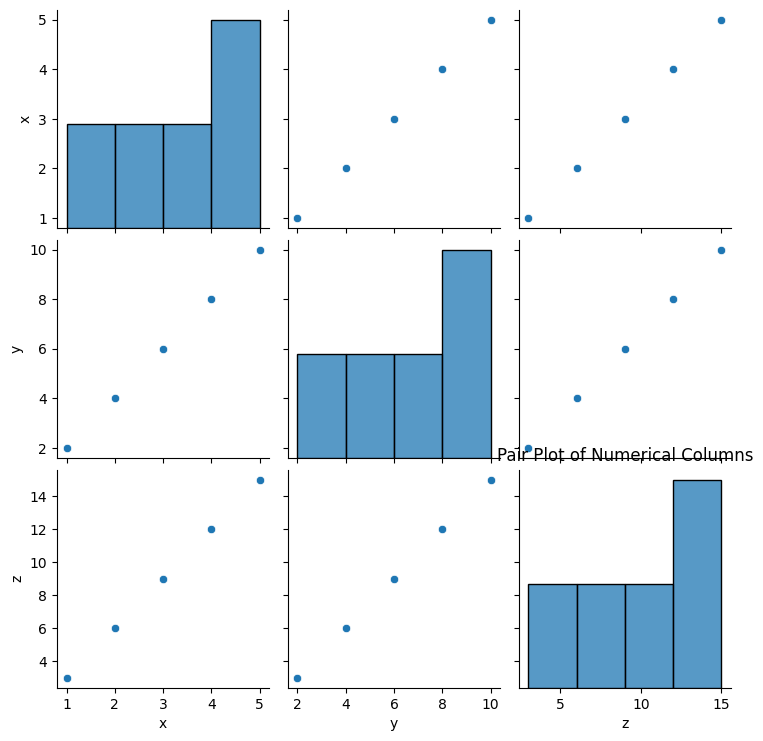

In [9]:
from pyspark.sql import SparkSession
import seaborn as sns
import matplotlib.pyplot as plt
# Create SparkSession
spark = SparkSession.builder \
    .appName("PairPlot") \
    .getOrCreate()
# Sample data (replace this with your DataFrame)
data = [(1, 2, 3), (2, 4, 6), (3, 6, 9), (4, 8, 12), (5, 10, 15)]
df = spark.createDataFrame(data, ["x", "y", "z"])
# Convert DataFrame to Pandas DataFrame for visualization
df_pandas = df.toPandas()
# Generate pair plot
sns.pairplot(df_pandas)
plt.title("Pair Plot of Numerical Columns")
plt.show()
# Stop SparkSession
spark.stop()
